# ドル円 週足 メジアン統計

In [1]:
import datetime
import os

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pingouin as pg
import seaborn as sns
import yfinance as yf

In [2]:
code = "USDJPY=X"
symbol = code
ticker = yf.Ticker(symbol)

In [3]:
### 最新のデータが取得されていることを確認 ###
ticker.history(period="1d", interval="1m").tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2026-02-20 21:55:00+00:00,155.024994,155.059006,154.987000,155.044998,0,0.0,0.0
2026-02-20 21:56:00+00:00,155.014008,155.074005,155.011993,155.059998,0,0.0,0.0
2026-02-20 21:57:00+00:00,155.020004,155.069000,155.014008,155.054993,0,0.0,0.0
2026-02-20 21:58:00+00:00,155.059006,155.074005,155.052994,155.063995,0,0.0,0.0
2026-02-20 21:59:00+00:00,155.054993,155.070999,154.988007,154.988998,0,0.0,0.0


In [4]:
# 週足で過去 5 年分のデータを取得
df0 = ticker.history(period="10y", interval="1wk")

# ローソク足のチャートには、そのうち過去 3 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_3y = datetime.timedelta(days=365 * 3)
df = df0[df0.index >= dt_last - tdelta_3y]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-20 00:00:00+00:00,134.307007,136.470001,133.929001,136.470001,0,0.0,0.0
2023-02-27 00:00:00+00:00,136.395004,137.065002,135.259995,135.839996,0,0.0,0.0
2023-03-06 00:00:00+00:00,135.869995,137.895996,134.171997,135.000000,0,0.0,0.0
2023-03-13 00:00:00+00:00,134.970001,135.057999,131.744003,131.830002,0,0.0,0.0
2023-03-20 00:00:00+00:00,132.283997,132.992996,129.673996,130.744995,0,0.0,0.0
...,...,...,...,...,...,...,...
2026-01-19 00:00:00+00:00,157.567001,159.207001,155.690002,155.710007,0,0.0,0.0
2026-01-26 00:00:00+00:00,155.186996,155.326004,152.330002,154.740005,0,0.0,0.0
2026-02-02 00:00:00+00:00,155.134995,157.328003,154.569000,157.199997,0,0.0,0.0


In [5]:
dt = df.tail(1).index[0]
year_str = f"{dt.year:04d}"
date_str = f"{dt.month:02d}{dt.day:02d}"
date_str

'0216'

In [6]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2026-02-16 00:00:00+00:00,152.787994,155.643005,152.701004,154.988998,0,0.0,0.0


In [7]:
df.tail(2)["Close"]

Date
2026-02-09 00:00:00+00:00    152.679993
2026-02-16 00:00:00+00:00    154.988998
Name: Close, dtype: float64

In [8]:
df.tail(2)["Close"].diff()

Date
2026-02-09 00:00:00+00:00         NaN
2026-02-16 00:00:00+00:00    2.309006
Name: Close, dtype: float64

In [9]:
df["Close"].rolling(9).median().tail(5)

Date
2026-01-19 00:00:00+00:00    156.559998
2026-01-26 00:00:00+00:00    156.559998
2026-02-02 00:00:00+00:00    156.789993
2026-02-09 00:00:00+00:00    156.789993
2026-02-16 00:00:00+00:00    156.559998
Name: Close, dtype: float64

In [10]:
df["Close"].rolling(13).median().tail(5)

Date
2026-01-19 00:00:00+00:00    156.149994
2026-01-26 00:00:00+00:00    156.149994
2026-02-02 00:00:00+00:00    156.410004
2026-02-09 00:00:00+00:00    156.410004
2026-02-16 00:00:00+00:00    156.149994
Name: Close, dtype: float64

In [11]:
df["Close"].rolling(26).median().tail(5)

Date
2026-01-19 00:00:00+00:00    153.110497
2026-01-26 00:00:00+00:00    153.707001
2026-02-02 00:00:00+00:00    154.266998
2026-02-09 00:00:00+00:00    154.266998
2026-02-16 00:00:00+00:00    154.639999
Name: Close, dtype: float64

In [12]:
df["Close"].rolling(52).median().tail(25)

Date
2025-09-01 00:00:00+01:00    148.324997
2025-09-08 00:00:00+01:00    148.324997
2025-09-15 00:00:00+01:00    148.324997
2025-09-22 00:00:00+01:00    148.669998
2025-09-29 00:00:00+01:00    148.324997
2025-10-06 00:00:00+01:00    148.324997
2025-10-13 00:00:00+01:00    148.324997
2025-10-20 00:00:00+01:00    148.324997
2025-10-27 00:00:00+00:00    148.324997
2025-11-03 00:00:00+00:00    148.324997
2025-11-10 00:00:00+00:00    148.324997
2025-11-17 00:00:00+00:00    148.324997
2025-11-24 00:00:00+00:00    148.324997
2025-12-01 00:00:00+00:00    148.324997
2025-12-08 00:00:00+00:00    148.324997
2025-12-15 00:00:00+00:00    148.324997
2025-12-22 00:00:00+00:00    148.324997
2025-12-29 00:00:00+00:00    148.324997
2026-01-05 00:00:00+00:00    148.324997
2026-01-12 00:00:00+00:00    148.324997
2026-01-19 00:00:00+00:00    148.324997
2026-01-26 00:00:00+00:00    148.324997
2026-02-02 00:00:00+00:00    148.324997
2026-02-09 00:00:00+00:00    148.324997
2026-02-16 00:00:00+00:00    148.32

In [13]:
df0["Close"].rolling(100).median().tail(5)

Date
2026-01-19 00:00:00+00:00    150.601997
2026-01-26 00:00:00+00:00    150.896996
2026-02-02 00:00:00+00:00    151.259995
2026-02-09 00:00:00+00:00    151.369995
2026-02-16 00:00:00+00:00    151.369995
Name: Close, dtype: float64

In [14]:
df0["Close"].rolling(200).median().tail(5)

Date
2026-01-19 00:00:00+00:00    146.734497
2026-01-26 00:00:00+00:00    146.869995
2026-02-02 00:00:00+00:00    146.941994
2026-02-09 00:00:00+00:00    146.987000
2026-02-16 00:00:00+00:00    147.040001
Name: Close, dtype: float64

In [15]:
df0["Close"].rolling(300).median().tail(5)

Date
2026-01-19 00:00:00+00:00    139.254997
2026-01-26 00:00:00+00:00    139.680000
2026-02-02 00:00:00+00:00    140.085999
2026-02-09 00:00:00+00:00    140.270996
2026-02-16 00:00:00+00:00    140.494995
Name: Close, dtype: float64

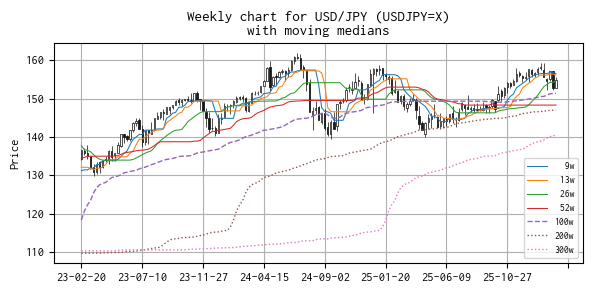

In [16]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 9

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)

mm09 = df0["Close"].rolling(9).median()
mm13 = df0["Close"].rolling(13).median()
mm26 = df0["Close"].rolling(26).median()
mm52 = df0["Close"].rolling(52).median()
mm100 = df0["Close"].rolling(100).median()
mm200 = df0["Close"].rolling(200).median()
mm300 = df0["Close"].rolling(300).median()
apds = [
    mpf.make_addplot(mm09[df.index], width=0.75, label="  9w", ax=ax),
    mpf.make_addplot(mm13[df.index], width=0.75, label=" 13w", ax=ax),
    mpf.make_addplot(mm26[df.index], width=0.75, label=" 26w", ax=ax),
    mpf.make_addplot(mm52[df.index], width=0.75, label=" 52w", ax=ax),
    mpf.make_addplot(mm100[df.index], width=1, linestyle="dashed", label="100w", ax=ax),
    mpf.make_addplot(
        mm200[df.index],
        width=1,
        linestyle="dotted",
        label="200w",
        ax=ax,
    ),
    mpf.make_addplot(
        mm300[df.index],
        width=1,
        linestyle="dotted",
        label="300w",
        ax=ax,
    ),
]

mpf.plot(
    df,
    type="candle",
    style="default",
    volume=False,
    datetime_format="%y-%m-%d",
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title(
    "Weekly chart for %s (%s)\nwith moving medians" % (ticker.info["longName"], symbol)
)

ax.legend(loc="best", fontsize=7)
ax.grid()

plt.tight_layout()
plt.savefig(os.path.join(year_str, f"{date_str}_report_weekly_chart_robust_{code}.png"))
plt.show()

## Robust Bollinger bands

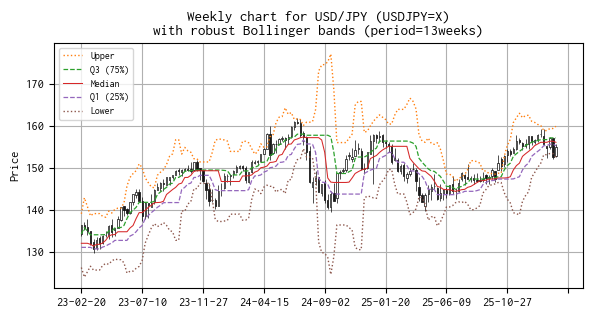

In [17]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 9

fig, ax = plt.subplots(figsize=(6, 3.25))

# Bollinger bands
period = 13
mv_median = df0["Close"].rolling(period).median()
mv_q1 = df0["Close"].rolling(period).quantile(0.25)
mv_q3 = df0["Close"].rolling(period).quantile(0.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds = [
    mpf.make_addplot(
        mv_upper[df.index],
        width=1,
        color="C1",
        linestyle="dotted",
        label="Upper",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_q3[df.index],
        width=0.9,
        color="C2",
        linestyle="dashed",
        label="Q3 (75%)",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_median[df.index], width=0.75, color="C3", label="Median", ax=ax
    ),
    mpf.make_addplot(
        mv_q1[df.index],
        width=0.9,
        color="C4",
        linestyle="dashed",
        label="Q1 (25%)",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_lower[df.index],
        width=1,
        color="C5",
        linestyle="dotted",
        label="Lower",
        ax=ax,
    ),
]

mpf.plot(
    df,
    type="candle",
    style="default",
    addplot=apds,
    datetime_format="%y-%m-%d",
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc="best", fontsize=7)

try:
    ax.set_title(
        "Weekly chart for %s (%s)\nwith robust Bollinger bands (period=%dweeks)"
        % (ticker.info["longName"], symbol, period)
    )
except KeyError:
    ax.set_title(
        "Weekly chart for %s\nwith robust Bollinger bands (period=%sweeks)"
        % (symbol, period)
    )

plt.tight_layout()
plt.savefig(
    os.path.join(
        year_str,
        f"{date_str}_report_weekly_chart_bollinger_robust_{code}.png",
    )
)
plt.show()

## ヒストグラム

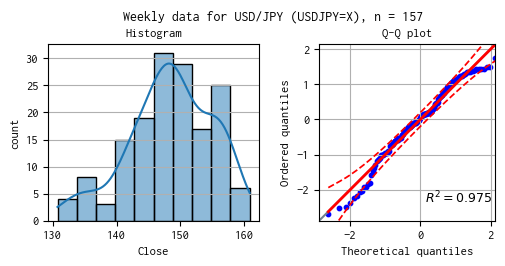

In [18]:
plt.rcParams["font.size"] = 9

fig, axes = plt.subplots(1, 2, figsize=(6, 2.5))

sns.histplot(df["Close"], kde=True, ax=axes[0])

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis="y")
axes[0].set_title("Histogram", fontsize=9)

# Q-Q プロット
pg.qqplot(df["Close"], s=10, ax=axes[1])
axes[1].set_title("Q-Q plot", fontsize=9)
axes[1].grid()

plt.suptitle(
    "Weekly data for %s (%s), n = %d" % (ticker.info["longName"], symbol, len(df)),
    fontsize=10,
)
plt.subplots_adjust(top=0.84, bottom=0.135, wspace=0.2)
plt.savefig(
    os.path.join(year_str, f"{date_str}_report_weekly_histogram_qqplot_{code}.png")
)
plt.show()